In [1]:
import paddle

# 数据集定义与加载

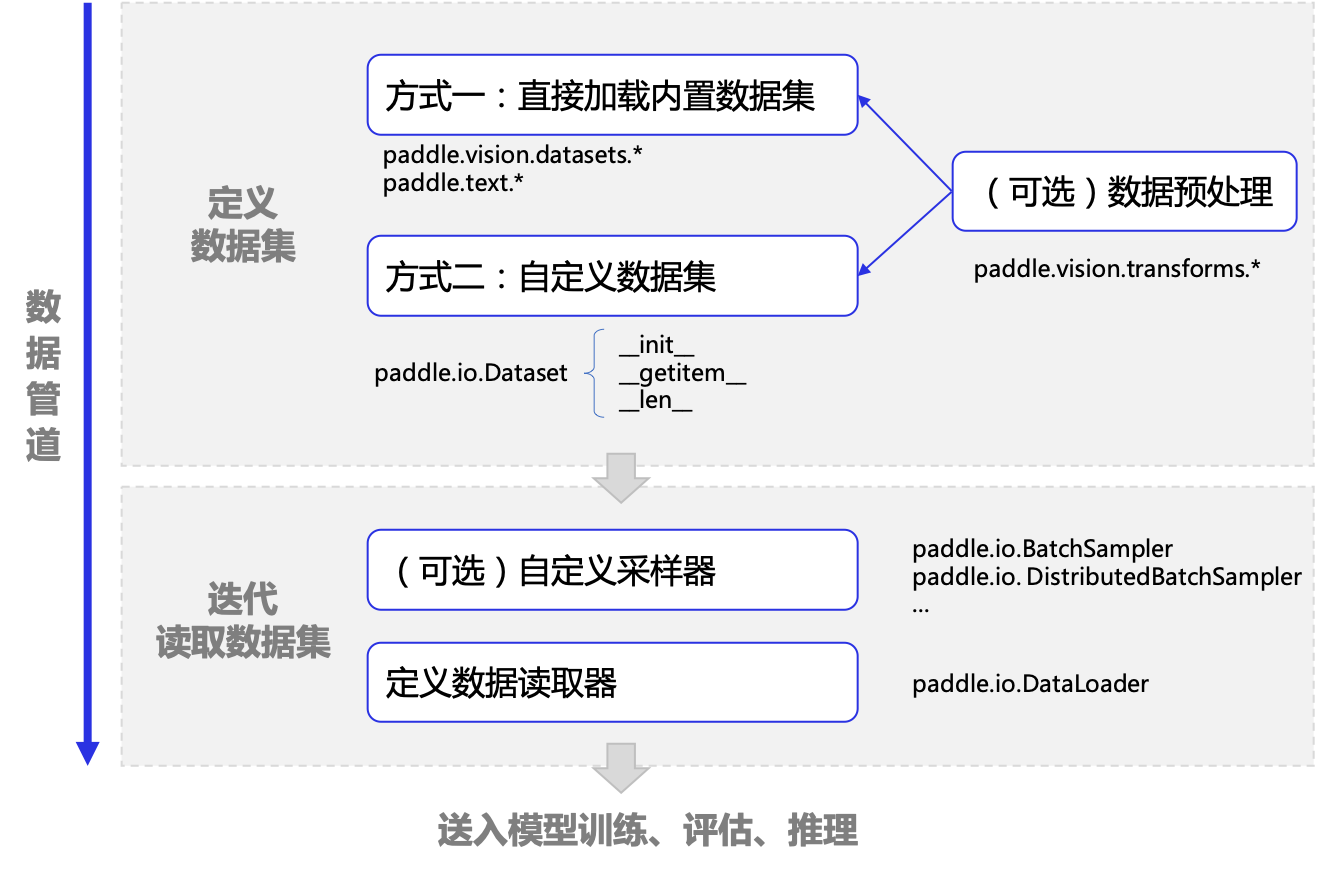

## 加载内置数据集

In [2]:
print('计算机视觉领域数据集：', paddle.vision.datasets.__all__)
print('自然语言处理数据集：', paddle.text.__all__)

计算机视觉领域数据集： ['DatasetFolder', 'ImageFolder', 'MNIST', 'FashionMNIST', 'Flowers', 'Cifar10', 'Cifar100', 'VOC2012']
自然语言处理数据集： ['Conll05st', 'Imdb', 'Imikolov', 'Movielens', 'UCIHousing', 'WMT14', 'WMT16', 'ViterbiDecoder', 'viterbi_decode']


In [29]:
from paddle.vision.transforms import Normalize

transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')

train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

print('训练数据集长度：{}, 测试数据集长度：{}'.format(len(train_dataset), len(test_dataset)))

训练数据集长度：60000, 测试数据集长度：10000


In [33]:
image0, label0 = train_dataset[0]

image0.shape

(1, 28, 28)

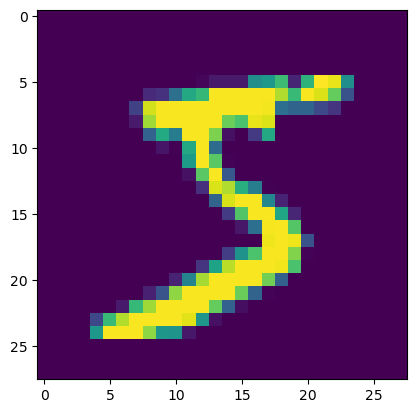

In [14]:
import matplotlib.pyplot as plt

plt.imshow(image0[0])

## 自定义数据集

In [38]:
import numpy as np
import cv2
import os

# 继承paddle.io.Dataset类
class MyDataset(paddle.io.Dataset):
    def __init__(self, data_dir, label_path, transform=None):
        super(MyDataset, self).__init__()
        
        self.data_list = []
        with open(label_path, encoding='utf-8') as f:
            for line in f.readlines():
                image_path, label = line.strip().split('\t')
                image_path = os.path.join(data_dir, image_path)
                self.data_list.append([image_path, label])
        
        self.transform = transform
    
    def __getitem__(self, index):
        # 根据索引，从列表中取出一张图像
        image_path, label = self.data_list[index]
        
        # 读取灰度图
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # 将图像数据格式转换为float32（飞浆训练默认格式）
        image = image.astype('float32')
        
        # 应用图像转换方法
        if self.transform is not None:
            image = self.transform(image)
            
        # 将label格式转换为int
        label = int(label)
        
        # 返回指定索引的单条数据（图像数据，对应的标签）
        return image, label
    
    def __len__(self):
        # 返回数据集的样本总数
        return len(self.data_list)

In [39]:
transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')

custom_train_dataset = MyDataset('../datasets/mnist/train', '../datasets/mnist/train/label.txt', transform)
custom_test_dataset = MyDataset('../datasets/mnist/val', '../datasets/mnist/val/label.txt', transform)

print('自定义训练数据集长度：{}，自定义测试数据集长度：{}'.format(len(custom_train_dataset), len(custom_test_dataset)))

自定义训练数据集长度：60000，自定义测试数据集长度：10000


In [42]:
image1, label1 = custom_train_dataset[1]

image1.shape

(1, 28, 28)

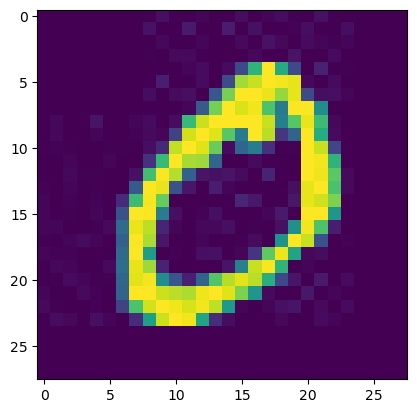

In [44]:
plt.imshow(image1[0])

## 迭代读取数据集

In [46]:
"""分批次迭代读取数据集

@batch_size 每批次读取的样本数量。总批次 = 样本总数 / 每批次数量
@shuffle 是否乱序读取
@drop_last 是否丢弃最后不完整的批次样本
@num_workers 同步/异步读取数据，当大于0时表示进程个数，即开启多进程方式异步加载数据
"""
train_loader = paddle.io.DataLoader(custom_train_dataset, batch_size=1000, 
                                    shuffle=True, drop_last=True, num_workers=0)

for batch, data in enumerate(train_loader()):
    images, labels = data
    print('batch: {}, image shape: {}, label shape: {}'.format(batch, images.shape, labels.shape))

batch: 0, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 1, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 2, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 3, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 4, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 5, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 6, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 7, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 8, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 9, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 10, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 11, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 12, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 13, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 14, image shape: [1000, 1, 28, 28], label shape: [1000]
batch: 15, image shape: [1000, 1, 28, 28], label shape: [1000]
ba